# Introductory applied machine learning (INFR10069)

<font color='red'>
Q1: 37  
Q2: 40  
Total: 77

# Assignment 1: Data analysis and visualisation

## Marking Breakdown

**70-100%** results/answer correct plus extra achievement at understanding or analysis of results. Clear explanations, evidence of creative or deeper thought will contribute to a higher grade.

**60-69%** results/answer correct or nearly correct and well explained.

**50-59%** results/answer in right direction but significant errors.

**40-49%** some evidence that the student has gained some understanding, but not answered the questions
properly.

**0-39%** serious error or slack work.

## Mechanics

You should produce a Jupyter notebook in answer to this assignment.
**You need to submit this notebook electronically as described below.**

Place your notebook in a directory called `iamlans` and submit this directory using the submit command on a DICE machine. The format is:

`submit iaml 1 iamlans`

You can check the status of your submissions with the `show submissions` command.

**Late submissions:** The policy stated in the School of Informatics MSc Degree Guide is that normally you will not be allowed to submit coursework late. See http://www.inf.ed.ac.uk/teaching/years/msc/courseguide10.html#exam for exceptions to this, e.g. in case of serious medical illness or serious personal problems.

**Collaboration:** You may discuss the assignment with your colleagues, provided that the writing that you submit is entirely your own. That is, you should NOT borrow actual text or code from other students. We ask that you provide a list of the people who you've had discussions with (if any).


## Important Instructions

1. In the following questions you are asked to run experiments using Python (version 2.7) and the following packages:
    * Numpy
    * Pandas
    * Scikit-learn
    * Matplotlib
    * Seaborn

2. Before you start make sure you have set up a vitual environment (or conda environment if you are working on your own machine) and the required packages installed. Instructions on how to set-up the working enviornment and install the required packages can be found in `01_Lab_1_Introduction`.

3. Wherever you are required to produce code you should use code cells, otherwise you should use markdown cells to report results and explain answers.

4. The .csv files that you will be using are located at `./datasets` (the `datasets` directory is adjacent to this file).

5. **IMPORTANT:** Keep your answers brief and concise. Most questions can be answered with 2-3 lines of explanation (excluding coding questions).

## Imports

Execute the cell below to import all packages you will be using in the rest of the assignemnt.

In [1]:
from __future__ import print_function, division
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sklearn
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
%matplotlib inline

## Description of the dataset

This assignment is based on the 20 Newsgroups Dataset. This dataset is a collection of approximately 20,000 newsgroup documents, partitioned (nearly) evenly across 20 different newsgroups, each corresponding to a different topic. Some of the newsgroups are very closely related to each other (e.g. comp.sys.ibm.pc.hardware, comp.sys.mac.hardware), while others are highly unrelated (e.g misc.forsale, soc.religion.christian). 

There are three versions of the 20 Newsgroups Dataset. In this assignment we will use the `bydate` matlab version in which documents are sorted by date into training (60%) and test (40%) sets, newsgroup-identifying headers are dropped and duplicates are removed. This collection comprises roughly 61,000 different words, which results in a bag-of-words representation with frequency counts. More specifically, each document is represented by a 61,000 dimensional vector that contains the counts for each of the 61,000 different words present in the respective document. 

To save you time and to make the problem manageable with limited computational resources, we preprocessed the original dataset. We will use documents from only 5 out of the 20 newsgroups, which results in a 5-class problem. More specifically the 5 classes correspond to the following newsgroups: 
1. `alt.atheism`
2. `comp.sys.ibm.pc.hardware`
3. `comp.sys.mac.hardware`
4. `rec.sport.baseball`
5. `rec.sport.hockey `

However, note here that classes 2-3 and 4-5 are rather closely related. Additionally, we computed the [mutual information](https://en.wikipedia.org/wiki/Mutual_information) of each word with the class attribute and selected the 520 words out of 61,000 that had highest mutual information. Therefore, our dataset is a $N \times 520$ dimensional matrix, where $N$ is the number of documents. For very sophisticated technical reasons 1 was added to all the word counts in part A. The resulting representation is much more compact and can be used directly to perform our experiments in Python.

## 1. Exploration of the dataset [40%]

Your first task is to get a feel for the data that you will be dealing with in the rest of the assignment.

### ========== Question 1.1 ==========
Load the datasets `train_20news_partA.csv` and `train_20news_partB.csv` into two separate pandas DataFrames.

In [2]:
data_path1 = os.path.join(os.getcwd(), 'datasets', 'train_20news_partA.csv')
data_path2 = os.path.join(os.getcwd(), 'datasets', 'train_20news_partB.csv')
news_A = pd.read_csv(data_path1, delimiter=",")
news_B = pd.read_csv(data_path2, delimiter=",")

<font color='red'>
Good!

### ========== Question 1.2 ==========
Display basic information for dataset A such as number of columns, type, and memory usage (*hint: pandas dataframes have a built in method for this*) 

In [3]:
print("news_A Info:")
news_A.info()


news_A Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2129 entries, 0 to 2256
Columns: 521 entries, w1_aaa to class
dtypes: int64(521)
memory usage: 8.5 MB


<font color='red'>
Good!

### ========== Question 1.3 ==========
How many data points and how many attributes are there in the dataset that we can use to model the target variable `class`?

There are 520 attributes we can use to model the target variable class, each with 2257 entries, so there are 1173640 datapoints in the set.

<font color='red'>
Correct on the attributes.

"Datapoints" refers to the individual documents - think of each row as a point in 520 dimensional space! So the correct answer is just 2129. (Check the above - there are actually 2129 rows.)

### ========== Question 1.4  ==========
Use a Pandas method to display the summary statistics for the `news_A` DataFrame.

In [4]:
print("Summary Statistics for news_A:")
news_A.describe()

Summary Statistics for news_A:


,w1_aaa,w2_pins,w3_kmr,w4_notion,w5_queens,w6_dwyer,w7_defenseman,w8_gld,w9_tocchet,w10_home,...,w512_constantly,w513_generate,w514_definite,w515_lacks,w516_combination,w517_sitting,w518_surface,w519_fashion,w520_sit,class
count,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.00000,2129.000000,2129.000000,2129.000000,2129.000000,...,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000
mean,5.128229,6.097698,6.120244,5.551902,5.521841,6.12776,5.633161,6.090653,5.970409,5.624706,...,9.666510,9.217473,9.061531,9.398309,9.175200,9.708783,8.807891,9.719587,9.307656,3.092532
std,38.292577,46.190953,46.656022,40.953913,40.978098,45.96434,41.146918,45.762060,44.266628,40.769105,...,45.844064,43.948910,40.969185,43.833064,42.403283,47.294120,39.341038,46.185082,45.059367,1.395948
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,3.000000,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,2.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,3.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,6.000000,4.000000
max,572.000000,583.000000,579.000000,580.000000,591.000000,600.00000,546.000000,591.000000,578.000000,578.000000,...,590.000000,587.000000,577.000000,598.000000,568.000000,599.000000,585.000000,600.000000,597.000000,5.000000


<font color='red'>
Good!

### ========== Question 1.5 ==========
Display the first 7 instances of dataset A.

In [5]:
print("First 7 entries of news_A dataset:")
news_A.head(7)

First 7 entries of news_A dataset:


,w1_aaa,w2_pins,w3_kmr,w4_notion,w5_queens,w6_dwyer,w7_defenseman,w8_gld,w9_tocchet,w10_home,...,w512_constantly,w513_generate,w514_definite,w515_lacks,w516_combination,w517_sitting,w518_surface,w519_fashion,w520_sit,class
0,1,1,1,1,1,1,1,1,1,1,...,1,5,3,6,8,4,6,4,8,4
1,1,1,1,1,1,1,1,1,1,1,...,2,3,6,8,3,4,5,6,5,4
2,1,1,1,1,1,1,1,1,1,2,...,4,2,6,5,2,5,5,7,8,2
3,1,1,1,1,1,1,1,1,1,1,...,6,3,6,1,1,8,1,8,4,3
4,1,1,1,1,1,1,1,1,1,1,...,6,1,7,8,6,3,1,8,4,3
5,1,1,1,1,1,1,1,1,1,1,...,7,5,4,5,5,7,7,7,2,2
6,1,1,1,1,2,1,1,1,1,1,...,3,6,8,8,3,5,2,1,2,1


<font color='red'>
Good!

### ========== Question 1.6 ==========
Display the names of the first 100 attributes in dataset A. 

You might observe that each attribute consists of two parts:
1. `w<x>_` (where x is an index corresponding to each word)
2. the actual name of the word

In [6]:
x = news_A.columns.values.tolist()

for i in range(0,100):
    print(x[i])


w1_aaa
w2_pins
w3_kmr
w4_notion
w5_queens
w6_dwyer
w7_defenseman
w8_gld
w9_tocchet
w10_home
w11_buying
w12_internet
w13_slots
w14_compatible
w15_transfer
w16_baltimore
w17_mean
w18_person
w19_performance
w20_support
w21_tor
w22_gm
w23_mouse
w24_base
w25_population
w26_bob
w27_set
w28_it
w29_earth
w30_faith
w31_steve
w32_caps
w33_printer
w34_east
w35_cable
w36_adapter
w37_mss
w38_catcher
w39_bullpen
w40_obp
w41_innocent
w42_european
w43_angeles
w44_settings
w45_words
w46_rit
w47_shots
w48_ports
w49_vga
w50_coverage
w51_jumpers
w52_bases
w53_sea
w54_pts
w55_behavior
w56_domi
w57_sabres
w58_yzerman
w59_messier
w60_goalies
w61_hawks
w62_our
w63_sx
w64_view
w65_hitters
w66_richard
w67_point
w68_nyi
w69_mvp
w70_kill
w71_nl
w72_field
w73_connector
w74_stars
w75_th
w76_install
w77_traded
w78_configuration
w79_standard
w80_rotation
w81_ultb
w82_sports
w83_pds
w84_canada
w85_did
w86_clock
w87_first
w88_switch
w89_tonight
w90_record
w91_singer
w92_majors
w93_royals
w94_does
w95_flames
w96_of
w97_

<font color='red'>
Good!

### ========== Question 1.7 ==========
Familiarise yourself with the [`stripplot`](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.stripplot.html) function in `seaborn`. Pick one attribute of your choice (except `class`) and display a stripplot for that attribute for dataset A. Demonstrate the distribution of the data separately for each class (by making appropriate use of the `x` argument in `stripplot`). Set the `jitter` argument to `True` and the `alpha` argument to an appropriate value (to add transparency). When the jitter parameter is enabled a small amount of noise is added to the data so that there is less overlap and the distribution is easier to visualise.

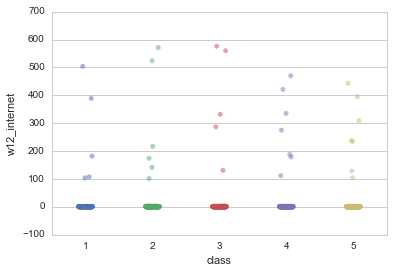

In [7]:
# pick attribute: attribute #12 "w12_internet"
internet = news_A['w12_internet']

# plot Attribute vs. Class
sns.set_style("whitegrid")
ax = sns.stripplot( x = news_A['class'], y=internet, jitter=True, alpha=.50)

<font color='red'>
Good!

### ========== Question 1.8 ==========
The stripplot illustrates the distribution of a single attribute. We can also visualise the joint distribution of two variables by using a scatter plot. Again, we want to add a bit of noise into the data so that is easier to see which parts of the space (2-dimensional in our case) have larger probability densities. 

For this, you will be using the function `scatter_jitter` provided below. This function takes as input two numpy arrays containing the features of interest. Pick two attributes of your choice from dataset A and use the provided function to plot their joint distribution. You can play around with the amount of noise added by tweaking the `jitter` parameter. Alternatively, you can just use its default value which is set to 0.2.

In [8]:
def scatter_jitter(arr1, arr2, jitter=0.2):
    """ Plots a joint scatter plot of two arrays by adding small noise to each example. 
    Noise is proportional to variance in each dimension. """
    arr1 = np.asarray(arr1)
    arr2 = np.asarray(arr2)
    arr1 = arr1 + jitter*arr1.std(axis=0)*np.random.standard_normal(arr1.shape)
    arr2 = arr2 + jitter*arr2.std(axis=0)*np.random.standard_normal(arr2.shape)
    plt.scatter(arr1, arr2, marker=4)

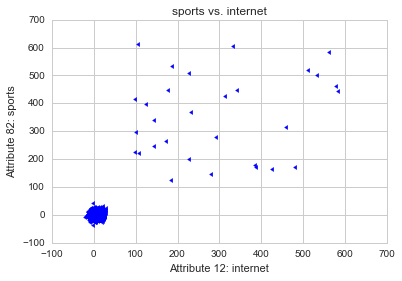

In [9]:
scatter_jitter(news_A['w12_internet'], news_A['w82_sports'])
plt.xlabel('Attribute 12: internet')
plt.ylabel('Attribute 82: sports')
plt.title('sports vs. internet')

<font color='red'>
Good!

### ========== Question 1.9 ==========
From the strip and scatter plots above you might observe that there is something peculiar about the data. Indeed most attributes take very small values (usually in the range 1-10) but there are some data points (i.e. rows) in the dataset where the attributes take very large values. These data points are called [outliers](https://en.wikipedia.org/wiki/Outlier).

You might think that the presence of outliers in the dataset has been a resut of noise contamination (you wouldn't expect the same word to appear 600 times within an e-mail, would you?). Your job now is to create a new dataset from dataset A (name it `news_A_clean`) and remove the outliers. Create some metric to find the outliers and check that your metric is reasonable. Be careful not to alter the original `news_A`...we may require it in its dirty format later...

In [10]:
# make deep copy of news_A
news_A_clean = news_A.copy(deep=True)

# remove outliers (metric = datapoints less than 100)
news_A_clean = news_A_clean[news_A_clean < 100]
news_A_clean.dropna(inplace=True)

<font color='red'>
You haven't demonstrated that your threshold is sensible. A nice way to do this would be to plot the maximum attribute value for each datapoint, to visually demonstrate that only a small fraction exceed your threshold.

### ========== Question 1.10 ==========
Write code to return the number of data points in the clean dataset, and the number of documents that have been excluded as outliers

In [11]:
# total datapoints = # of rows * # of columns
n_clean_datapoints = news_A_clean.shape[0] * news_A_clean.shape[1]
print("Number of data points in the clean dataset: {}".format(n_clean_datapoints))

n_datapoints = news_A.shape[0] * news_A.shape[1]
n_outliers = n_datapoints - n_clean_datapoints
print("Number of documents excluded as outliers: {}".format(n_outliers))

Number of data points in the clean dataset: 1089411
Number of documents excluded as outliers: 19798


<font color='red'>
Good, although with the same confusion with datapoints as before.

## 2. Naive Bayes classification [60%]
Now we want to fit a Gaussian Naive Bayes model to the cleaned dataset A. You might want first to familiarise yourself with the [`GaussianNB`](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html) class in `Sklearn`.

### ========== Question 2.1 ==========

By using the `scatter_jitter` function provided above, display a scatter plot of the features `w281_ico` and `w273_tek` for the cleaned dataset A. Set the jitter value to something small (e.g. 0.1). Label axes appropriately.

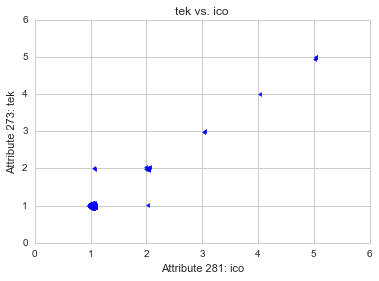

In [12]:
scatter_jitter(news_A_clean['w281_ico'], news_A_clean['w273_tek'], .1)
plt.xlabel('Attribute 281: ico')
plt.ylabel('Attribute 273: tek')
plt.title('tek vs. ico')

<font color='red'>
Good!

### ========== Question 2.2 ==========
What do you observe? 

How does that relate to the Naive Bayes assumption? 

What would be the main issue we would have to face if we didn't make this assumption?

Observations: The data seems to cluster in small groups, with the heaviest cluster occurring at (1,1) aka (0,0). Together, the clusters seems to form a positive linear trend. If we were to draw a trendline on the graph it would almost fit y=x perfectly. This means that the datapoints for the "ico" and "tek" attributes are very similar, as they often have the same class values.

This relates to the Naive Bayes assumption because we cannot compute the P(x1...x2256 | y) for all 2256 observations. This would be (2256)^2 calculations, which is not feasible. In order to make this feasible we assume x1...x2256 is conditionally independent given y. Now our calculation is simple, we only have to compute P(x|y) for each observation of x.

<font color='red'>
You could state more clearly that the two attributes are *correlated*.

You're also not quite right on your reasoning of why this is a problem. We never have to calculate the joint probability of every *datapoint* - we have to compute the joint probability of every *attribute* for one datapoint. In this case, we are estimating probabilities with Guassians. By making the independence assumption, we can calculate the joint probability with 520 1-dimensional Guassians, which is easy. If we don't asume independence, we would have to estimate a single 520-dimensional Guassian. This would require calculating a full 520-dimensional covariance matrix, which would require an infeasible amount of data.

### ========== Question 2.3 ==========
Fit a Gaussian Naive Bayes model to the cleaned dataset A. Your input features should be all the attributes in the dataset except the `class` attribute which will be your target. Display the classification accuracy on the training dataset.

In [13]:
# Isolate input features
X = news_A_clean.drop('class', axis=1)

# Isolate target
y = news_A_clean['class']

# train a Gaussian Naive Bayes classifier by initialise a GaussianNB object
gnb = GaussianNB()

# fit the classifier using the X and y arrays extracted above
gnb.fit(X=X, y=y)

GaussianNB()

<font color='red'>
Good, but you don't report the classification accuracy!

### ========== Question 2.4 ==========
Plot the (normalised) confusion matrix for the training data. Label axes appropriately.

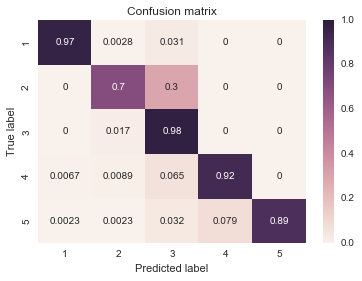

In [14]:
# Function taken from Lab 2
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True)
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# predict the output of the classifier by using the training data as input
training_prediction = gnb.predict(X=X)

# Compute the classification accuracy on the training data
ca = accuracy_score(y, gnb.predict(X))

# Compute the resulting confusion matrix
cm = confusion_matrix(y, training_prediction)

# Normalize the confusion matrix
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]

plt.figure()
plot_confusion_matrix(cm_norm, classes=['1', '2', '3', '4','5'])

<font color='red'>
Good!

You should label your classes with their actual names (alt.atheism etc.) - this makes the confusion matrix considerably easier to interpret.

### ========== Question 2.5  ==========

Comment on the confusion matrix from the previous question. Does it look like what you would have expected? Explain.

It looks somewhat like what I would've expected, the classisifer accurately predicted the class for classes 1, 3, 4, and 5 reasonably well. However, it only accurately predicited class 2 70% of the time. This seems low for a classifier that was tested on the same data that was used to train it. It also inaccuractely predicted class 2 as class 3, the other 30% of the time. Also this model never inaccurately predicted class 5, however, it occasionally predicted something else when the true class was 5.

<font color='red'>
You should comment on why you might expect these features
- the two most frequently confused classes are the two tech-related topics, which makes sense as these will share common vocabulary. 
- The atheism topic has the best classification accuracy, which makes sense as it is likely to have the most distinct vocabulary in the given topics.  

### ========== Question 2.6 ==========
Fit a Gaussian Naive Bayes model to the original dataset A (including the outliers). Display the classification accuracy on the training dataset.

In [15]:
og_X = news_A.drop('class', axis=1)
og_y = news_A['class']
gnb2 = GaussianNB()
gnb2.fit(X=og_X, y=og_y)

og_ca = accuracy_score(og_y, gnb2.predict(og_X))

print("classification accuracy for cleaned dataset(excluding outliers): {}".format(ca))
print("classification accuracy for original dataset(including outliers): {}".format(og_ca))
print("\ndifference in accuracy: {}".format(ca - og_ca))

classification accuracy for cleaned dataset(excluding outliers): 0.889048302248
classification accuracy for original dataset(including outliers): 0.205260685768

difference in accuracy: 0.68378761648


<font color='red'>
Good!

### ========== Question 2.7 ==========
Comment on the above results (Questions 2.3 & 2.6). In particular explain why you think that cleaning the data helps in this case.

Cleaning the dataset, removing outliers and any "not numbers" greatly improves the accuracy of a model. In this case it improved the classification accuracy by almost 70%. A model is essentially useless if it doesn't predict reasonably accurate results. Having a model that predicts accurately 89% of the time is obviously much better than a model that predicts accurately only 20% of the time.

<font color='red'>
You have't explained *why* cleaning the data makes the model work better. In this case, outliers will lead to overestimated mean and variance parameters of our Guassian distributions. This will result in poor estimation of probabilities for new data points.

### ========== Question 2.8 ==========

Now we want to evaluate the generalisation of the classifier on new (i.e. unseen data). Use the classifier you trained in Question 2.5 (i.e. on the cleaned dataset) and test its performance on dataset `train_20news_partB`. 

Display the (normalized) confusion matrix and the classification accuracy on the Dataset B.

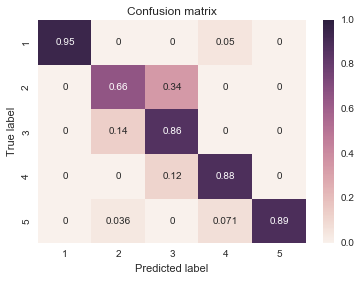

In [16]:
X_B = news_B.drop('class', axis=1)
y_B = news_B['class']

# predict the output of the classifier by using the news_B as input
tr_predict_B = gnb.predict(X=X_B)

# Compute the classification accuracy on news_B data
ca_B = accuracy_score(y_B, gnb.predict(X_B))

# Compute the resulting confusion matrix
cm_B = confusion_matrix(y_B, tr_predict_B)

# Normalize the confusion matrix
cm_norm_B = cm_B/cm_B.sum(axis=1)[:, np.newaxis]

plt.figure()
plot_confusion_matrix(cm_norm_B, classes=['1', '2', '3', '4','5'])

<font color='red'>
Good, but missing the overall classification accuracy.

### ========== Question 2.9 ==========

Comment on the results from the previous question. Do you think this is an acceptable level of performance? Which are the easiest and most difficult classes to predict correctly? 

I think an accuracy of 80% or greater is reasonable, so the results of the confusion matrix using news_B as input data performed reasoanbly well for classes 3, 4, & 5, exceptionally well for class 1, and poorly for class 2. Based on these results and the results from question 2.4, Class 1 is the easiest to predict, follwed by Classes 3, 4, & 5, and Class 2 is the most difficult to predict. This is generally the same for both results, but using the training data as the input data (news_A_clean) had slightly more accurate predictions in all classes than using news_B as the input data.

<font color='red'>
Good!

### ========== Question 2.10 ==========
What is a reasonable baseline against which to compare the classiffication performance? *Hint: What is the simplest classiffier you can think of and what would its performance be on this dataset?* 

I think a reasonable baseline would be random classification, meaning for each input we randomly pick class. This means that each class will get picked an equal number of times and there is a 1/5 chance that prediction would be correct.

<font color='red'>
Reasonable, although a simpler, more deterministic and (likely) more accurate solution is to simply predict the same class for every data point - the class with the highest prior probability. This should give minimum 20% accuracy, and possibly considerably better if one class occurs significantly more often than the others.

### ========== Question 2.11 ==========

Estimate the baseline performance.

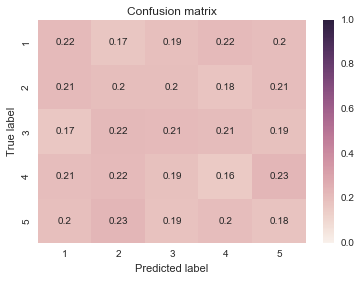

In [17]:
X_random = np.random.randint(1,6,size=2091)

ca_random = accuracy_score(y, X_random)
cm_random = confusion_matrix(y, X_random)
cm_norm_random = cm_random/cm_random.sum(axis=1)[:, np.newaxis]

plt.figure()
plot_confusion_matrix(cm_norm_random, classes=['1', '2', '3', '4','5'])


<font color='red'>
Missing overall accuracy, but otherwise looks as expected for this method.

### ========== Question 2.12 ==========

Execute the cell below to get the prediction on the test dataset by using a different classifier which we will be introducing in this class later on. By using this prediction provided below (`rf_prediction`) plot the confusion matrix and display the classification accuracy on the test dataset. *Important: Make sure the test dataset is loaded in a DataFrame called `news_B` otherwise execution will return an error. In that case replace the DataFrame name in the third line.*

Classification accuracy on the test set by using a Random Forest: 0.890625


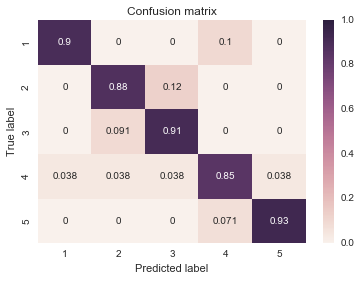

In [18]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 50).fit(X=X, y=y)
X_ts = news_B.drop('class', axis=1)
rf_prediction = rf.predict(X=X_ts)

y_ts = news_B['class']

print('Classification accuracy on the test set by using a Random Forest:', accuracy_score(y_ts, rf.predict(X=X_ts)))
plt.figure()
cm = confusion_matrix(y_ts, rf_prediction)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plot_confusion_matrix(cm_norm, classes=['1', '2', '3', '4','5'])

<font color='red'>
Good!

### ========== Question 2.13 ==========

Which classifier (Naive Bayes or Random Forest) would you trust if you had to choose? What are the reasons you believe the Gaussian Naive Bayes classifier does not perofm so well in this particular problem? You are not expected to justify the performance level achieved by the Random Forest classifier.

I'd rather use the Random Forest model because it performs either better or equally compared to Naive Bayes. The main difference is that is has a very accurate performace for all classes, including class 2, which the Naive Bayes model did not. I think that Gaussian Naive Bayes didn't perform well because the conditional independence assumption fails, but we have to make it anyway in order to calculate compute the model. I think it is also important to note the similarity of class 2 and 3 (comp.sys.ibm.pc.hardware & comp.sys.mac.hardware) and class 4 and 5 (rec.sport.baseball & rec.sport.hockey) It seems easy to get those pairs confused with one another, especially if you have a weak model.

<font color='red'>
In general, all classifiers will struggle with closely related classes; this is not unique to naive bayes.

Some other pertinent problems with Guassian naive bayes in this case are:

- Guassian distributions are not ideally suited to modelling this type of discrete numerical data - Poisson distributions would be better.

- Our guassian model will be distorted significantly by outliers in the data, which isn't a problem for RF. You can demonstrate this nicely by testing RF on the non-cleaned data, and observing a much smaller drop in accuracy than for GNB.